In [10]:
import numpy as np
import matplotlib.pyplot as plt

import process_mnist
from network import Hopfield_Network

(10000,)
(10000, 10, 10)


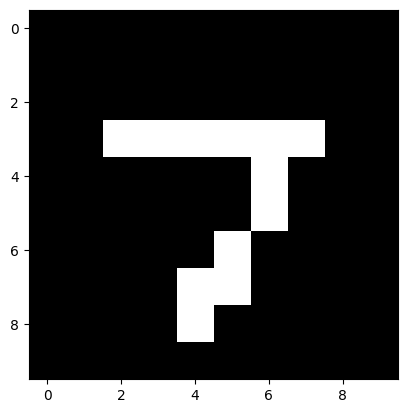

In [11]:
data = np.loadtxt("./data/mnist_test.csv", delimiter=',')
labels = data[:, 0]

height = 28
width = 28

data = data[:, 1:].reshape((-1, height, width))
data = data[:, ::3, ::3]

height = len(data[0])
width = len(data[0, 0])

print(labels.shape)
print(data.shape)

# binarize data
maxval = 1
thresh = 0
data_bin = (data > thresh) * maxval
data_bin = np.where(data==0, -1.0, 1.0)

process_mnist.get_image(data_bin[0])

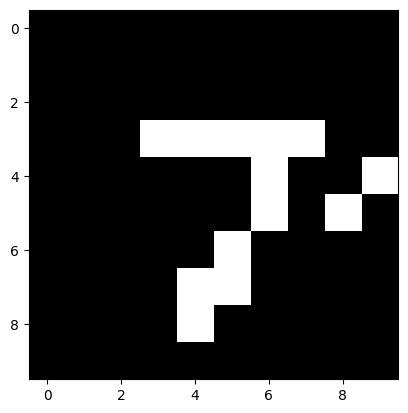

iteration: 0

iteration: 1

iteration: 2

iteration: 3

iteration: 4

iteration: 5

iteration: 6

iteration: 7

iteration: 8

iteration: 9



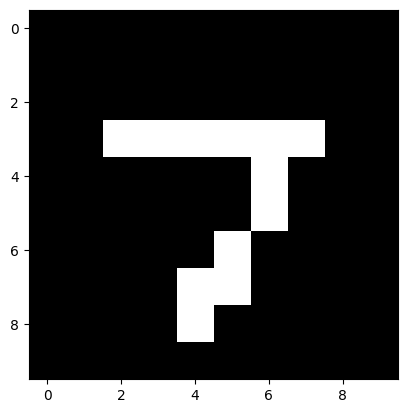

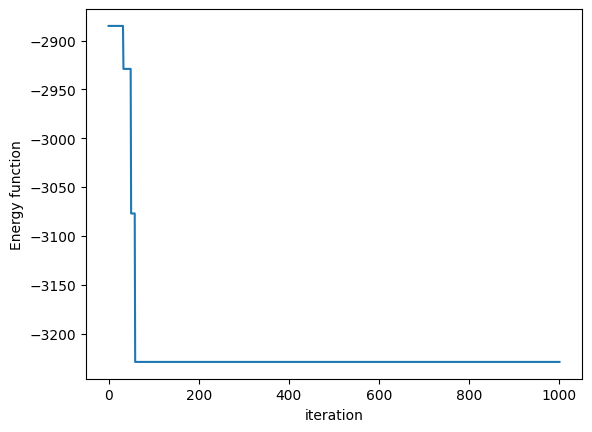

In [12]:
model = Hopfield_Network(height*width)

model.fit(data_bin[0:2].reshape(-1, height*width))

noisy_data = data_bin[0].copy()
noisy_data += np.random.normal(0, 0.5, noisy_data.shape)
noisy_data = np.where(noisy_data > 0, 1, -1)
process_mnist.get_image(noisy_data)

y = model.predict(noisy_data)
process_mnist.get_image(y.reshape((height, width)))
model.plot_energies()